# Answer Questions with Chicago Crime Data

Shenyue Jia

## Imports

In [1]:
import pandas as pd
import os, glob

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker as mticks

pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

## Data preparation

- Chicago crime data
    - Source: [Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2)
    - CSV cleaned and splitted by years (link)
- Holiday data
    - [Share URL](https://docs.google.com/spreadsheets/d/1d8hoZzDAhbWx6EwNjrMTTOE5-23Pr1VxJeUxVj1JL9U/edit?usp=sharing)

### Holiday data

In [2]:
# read holiday data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTMR4vi1nFtbYO_WLqecU6WoRAQ0F-_QCMcuWUoZhuTygAP2U668cddCWBeAV2eop9fFdyXX856AB2j/pub?output=csv'
holiday = pd.read_csv(url)
holiday.head()

,Date,US Holidays,State Holidays
0,2001-01-01,New Year's Day,New Year's Day
1,2001-01-02,NaN,NaN
2,2001-01-03,NaN,NaN
3,2001-01-04,NaN,NaN
4,2001-01-05,NaN,NaN


### Read and concatenate Chicago Crime Data

In [3]:
# find all csv file under Data/Chicago folder
path = 'Data/Chicago'
csv_files = glob.glob(path + "/*.csv")
csv_files.sort()
print(csv_files)

['Data/Chicago/Chicago-Crime_2001.csv', 'Data/Chicago/Chicago-Crime_2002.csv', 'Data/Chicago/Chicago-Crime_2003.csv', 'Data/Chicago/Chicago-Crime_2004.csv', 'Data/Chicago/Chicago-Crime_2005.csv', 'Data/Chicago/Chicago-Crime_2006.csv', 'Data/Chicago/Chicago-Crime_2007.csv', 'Data/Chicago/Chicago-Crime_2008.csv', 'Data/Chicago/Chicago-Crime_2009.csv', 'Data/Chicago/Chicago-Crime_2010.csv', 'Data/Chicago/Chicago-Crime_2011.csv', 'Data/Chicago/Chicago-Crime_2012.csv', 'Data/Chicago/Chicago-Crime_2013.csv', 'Data/Chicago/Chicago-Crime_2014.csv', 'Data/Chicago/Chicago-Crime_2015.csv', 'Data/Chicago/Chicago-Crime_2016.csv', 'Data/Chicago/Chicago-Crime_2017.csv', 'Data/Chicago/Chicago-Crime_2018.csv', 'Data/Chicago/Chicago-Crime_2019.csv', 'Data/Chicago/Chicago-Crime_2020.csv', 'Data/Chicago/Chicago-Crime_2021.csv', 'Data/Chicago/Chicago-Crime_2022.csv', 'Data/Chicago/Chicago-Crime_2023.csv']


In [4]:
# read and concatenate csv_files
df = pd.concat([pd.read_csv(file) for file in csv_files ], ignore_index=True)
display(df.head(),df.tail())

,Datetime,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,2001-01-01 00:00:00,1322043,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,825,8.00,NaN,41.78,-87.68
1,2001-01-01 00:00:00,2616775,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,2423,24.00,49.00,42.01,-87.67
2,2001-01-01 00:00:00,8146039,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,2521,25.00,31.00,41.93,-87.75
3,2001-01-01 00:00:00,9748516,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,NaN,NaN
4,2001-01-01 00:00:00,10473864,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,OTHER,False,False,1233,12.00,2.00,NaN,NaN


,Datetime,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
7765324,2023-03-25 23:50:00,13022210,THEFT,OVER $500,HOTEL / MOTEL,False,False,111,1.00,42.00,41.89,-87.63
7765325,2023-03-25 23:51:00,13021672,LIQUOR LAW VIOLATION,ILLEGAL POSSESSION BY MINOR,STREET,False,False,624,6.00,6.00,41.75,-87.61
7765326,2023-03-25 23:57:00,13021664,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1412,14.00,35.00,41.94,-87.71
7765327,2023-03-25 23:58:00,13021669,BATTERY,"PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / ...",STREET,True,False,624,6.00,6.00,41.75,-87.61
7765328,2023-03-25 23:58:00,13022241,ASSAULT,SIMPLE,RESIDENCE,False,False,823,8.00,23.00,41.78,-87.71


### Convert `Datetime` to datetime dtype

In [5]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Datetime']

0         2001-01-01 00:00:00
1         2001-01-01 00:00:00
2         2001-01-01 00:00:00
3         2001-01-01 00:00:00
4         2001-01-01 00:00:00
                  ...        
7765324   2023-03-25 23:50:00
7765325   2023-03-25 23:51:00
7765326   2023-03-25 23:57:00
7765327   2023-03-25 23:58:00
7765328   2023-03-25 23:58:00
Name: Datetime, Length: 7765329, dtype: datetime64[ns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7765329 entries, 0 to 7765328
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Datetime              datetime64[ns]
 1   ID                    int64         
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 607.3+ MB


In [7]:
df.head()

,Datetime,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,2001-01-01,1322043,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,825,8.00,NaN,41.78,-87.68
1,2001-01-01,2616775,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,2423,24.00,49.00,42.01,-87.67
2,2001-01-01,8146039,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,2521,25.00,31.00,41.93,-87.75
3,2001-01-01,9748516,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,NaN,NaN
4,2001-01-01,10473864,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,OTHER,False,False,1233,12.00,2.00,NaN,NaN


### Set the `Datetime` as index

In [8]:
df = df.set_index('Datetime')
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,
2001-01-01,1322043,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,825,8.00,NaN,41.78,-87.68
2001-01-01,2616775,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,2423,24.00,49.00,42.01,-87.67
2001-01-01,8146039,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,2521,25.00,31.00,41.93,-87.75
2001-01-01,9748516,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,NaN,NaN
2001-01-01,10473864,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,OTHER,False,False,1233,12.00,2.00,NaN,NaN


### Create two forms of data

1. Original format with each row as one crime (`Datetime` index)
    - `df`
2. A resampled/converted crime counts version (Each row is 1 day)
    - `df_daycount`

In [9]:
# feature engineering to obtain extra columns
df_byday = df.copy()
df_byday['Date'] = pd.to_datetime(df.index.strftime('%Y-%m-%d'))
df_byday = df_byday.set_index('Date')
display(df_byday.head(3),df_byday.tail(3))

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01,1322043,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,825,8.00,NaN,41.78,-87.68
2001-01-01,2616775,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,2423,24.00,49.00,42.01,-87.67
2001-01-01,8146039,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,2521,25.00,31.00,41.93,-87.75


,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2023-03-25,13021664,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1412,14.00,35.00,41.94,-87.71
2023-03-25,13021669,BATTERY,"PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / ...",STREET,True,False,624,6.00,6.00,41.75,-87.61
2023-03-25,13022241,ASSAULT,SIMPLE,RESIDENCE,False,False,823,8.00,23.00,41.78,-87.71


In [10]:
# group data by Date
df_daycount = df_byday.groupby(['Date'])['ID'].agg('count').reset_index()
df_daycount.rename(columns = {'ID':'Count'}, inplace = True)
display(df_daycount.head(3),df_daycount.tail(3))

,Date,Count
0,2001-01-01,1825
1,2001-01-02,1143
2,2001-01-03,1151


,Date,Count
8116,2023-03-23,629
8117,2023-03-24,665
8118,2023-03-25,637


In [11]:
# set index as Date
df_daycount = df_daycount.set_index('Date')

## Answer questions related to Chicago Crime Data

### 1. Which district has the most crimes? Which has the least?

- District 8 has the most crimes
- District 21 has the least crimes

In [12]:
# number of crimes per district
count_by_dis = df['District'].value_counts().rename_axis('District').to_frame('Count')
count_by_dis = count_by_dis.reset_index()
display(count_by_dis.head(1),count_by_dis.tail(1))

,District,Count
0,8.00,521979


,District,Count
23,21.00,4


In [13]:
# create a barplot function
def plot_bar(df, y_column, pale, yticks, ylab):
  fig, axes = plt.subplots(nrows=1, figsize=(15,5), sharex=True)
  g = sns.countplot(data=df, y=y_column, 
              palette=pale, order = df[y_column].value_counts().index)
  g.set(yticklabels=yticks);
  g.set_xlabel('Counts');
  g.set_ylabel(ylab);
  g.set_title(f'Count of Each {ylab}', fontsize=14, weight = 'bold');

  total = float(len(df))
  for p in g.patches:
      count = round(p.get_width())
      y = p.get_y() + p.get_height()-0.3
      x = p.get_width()
      g.annotate(count, (x, y),ha='left')
        
  FOLDER = "PNG/"
  isExist = os.path.exists(FOLDER)
    
  if isExist == False:  
      os.makedirs(FOLDER, exist_ok=True)
        
  plt.savefig(f'{FOLDER}/{y_column}_barplot.png',bbox_inches='tight')

  return fig,g

In [14]:
# create a barplot for district column
yticks = count_by_dis['District']
pale = sns.color_palette("flare", count_by_dis.shape[0])
pale

[(0.92609759, 0.65099658, 0.48060392),
 (0.92237978, 0.61322733, 0.45740444),
 (0.91825103, 0.57516584, 0.43441436),
 (0.91366559, 0.53666778, 0.41177769),
 (0.90732341, 0.4939774, 0.38990532),
 (0.89995995, 0.45494253, 0.37420106),
 (0.89050882, 0.41601371, 0.36362102),
 (0.87806542, 0.37800172, 0.35942941),
 (0.85952586, 0.33905327, 0.36301129),
 (0.83765537, 0.30784814, 0.3723105),
 (0.81085964, 0.28202508, 0.38509649),
 (0.77932717, 0.26252522, 0.39889102),
 (0.74061927, 0.24733457, 0.41248516),
 (0.70342811, 0.2370976, 0.42226844),
 (0.66635279, 0.22717328, 0.43008427),
 (0.62963102, 0.2171635, 0.43606881),
 (0.58951566, 0.20622027, 0.44045213),
 (0.55314129, 0.19655316, 0.44225723),
 (0.51648277, 0.18774266, 0.44139128),
 (0.47936222, 0.18006056, 0.43733022),
 (0.43840678, 0.17219041, 0.42946642),
 (0.401357, 0.16501079, 0.41963528),
 (0.36470944, 0.15730861, 0.40792149),
 (0.32897621, 0.14807831, 0.39598285)]

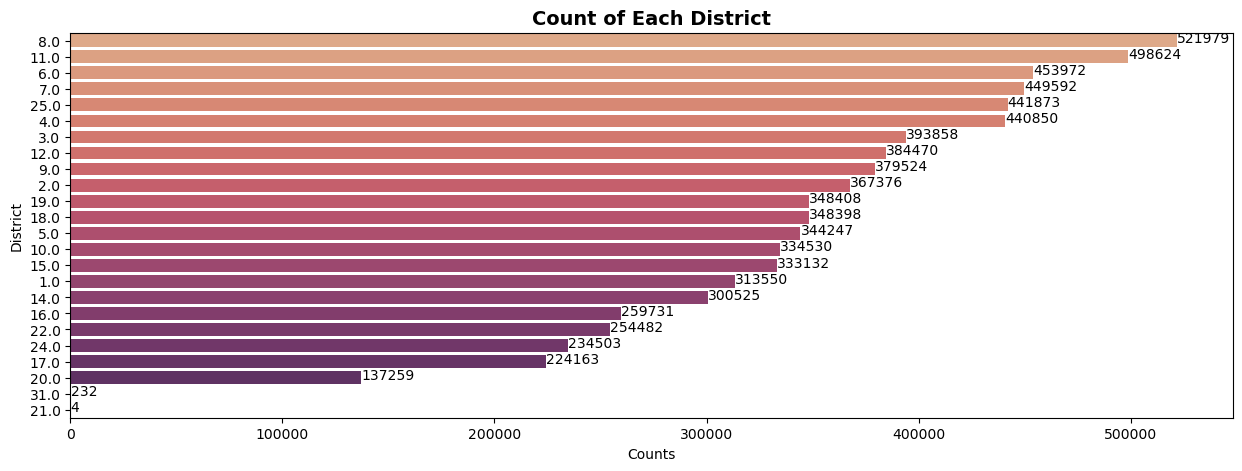

In [15]:
# plot crime counts by district
plot_bar(df_byday,
         y_column='District',
         pale=pale, yticks = yticks, ylab = 'District');

### 2. Comparing Across the Years
#### Is the total number of crimes increasing or decreasing across the years?

- Resample data to yearly
- Plot the resampled data

In [16]:
# resample the data to year
crime_by_year = df_daycount.resample('AS')['Count'].sum().reset_index()
crime_by_year['Date'] = pd.to_datetime(crime_by_year['Date'])
# crime_by_year['Year'] = crime_by_year['Date'].dt.year
# crime_by_year = crime_by_year.drop(columns='Date')
crime_by_year = crime_by_year.set_index('Date')
crime_by_year

,Count
Date,
2001-01-01,485877
2002-01-01,486801
2003-01-01,475979
2004-01-01,469420
2005-01-01,453770
2006-01-01,448174
2007-01-01,437083
2008-01-01,427165
2009-01-01,392818


In [17]:
# create tick locators and formatters
loc_5year = mdates.YearLocator(5)
fmt_year = mdates.DateFormatter("%Y")
loc_year = mdates.YearLocator(1)

In [18]:
# function for formatting money in thousands
def thousands(x, pos):
    xk = x/1000
    return f"${xk:,.0f}K"
str_fmt = mticks.FuncFormatter(thousands)

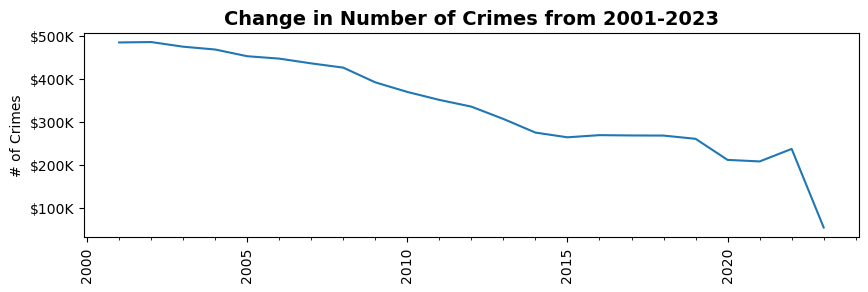

In [19]:
plt.rcParams['figure.figsize'] = (10,3)
fig, ax = plt.subplots()
ax.plot(crime_by_year.index, crime_by_year.values)

ax.set_title('Change in Number of Crimes from 2001-2023', fontsize=14, weight = 'bold')
ax.set_ylabel('# of Crimes')

ax.xaxis.set_major_locator(loc_5year)
ax.xaxis.set_major_formatter(fmt_year)
ax.xaxis.set_minor_locator(loc_year)

ax.yaxis.set_major_formatter(str_fmt)

fig = ax.get_figure()
fig.autofmt_xdate(rotation = 90, ha = 'center')

In [20]:
## Save to PNG
FOLDER = "PNG/"
fig.savefig(f'{FOLDER}/change-crime-yearly.png',bbox_inches='tight')

- **From the above plot, we can see the number of crime id decreasing despite a tick in 2022**

#### Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

- We need to use the original data to answer this question (`df`)

In [21]:
# inspect df again
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7765329 entries, 2001-01-01 00:00:00 to 2023-03-25 23:58:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 607.3+ MB


In [22]:
# add a count columns to be used later
df['Count'] = 1
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Count
Datetime,,,,,,,,,,,,
2001-01-01,1322043,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,825,8.00,NaN,41.78,-87.68,1
2001-01-01,2616775,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,2423,24.00,49.00,42.01,-87.67,1
2001-01-01,8146039,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,2521,25.00,31.00,41.93,-87.75,1
2001-01-01,9748516,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,NaN,NaN,1
2001-01-01,10473864,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,OTHER,False,False,1233,12.00,2.00,NaN,NaN,1


In [41]:
# create a yearly data and group by each Primary Type
# Resample the dataframe grouped by month
crime_year_type = df.groupby(['Primary Type']).resample('A')['Count'].sum().reset_index()
crime_year_type

,Primary Type,Datetime,Count
0,ARSON,2001-12-31,1011
1,ARSON,2002-12-31,1032
2,ARSON,2003-12-31,955
3,ARSON,2004-12-31,778
4,ARSON,2005-12-31,691
...,...,...,...
748,WEAPONS VIOLATION,2019-12-31,6339
749,WEAPONS VIOLATION,2020-12-31,8432
750,WEAPONS VIOLATION,2021-12-31,8979
751,WEAPONS VIOLATION,2022-12-31,8748


In [42]:
# convert the long-form to separate each primary type to a separate column
# pivot the result to have the datetime as the index and the crime as the columns
crime_year_type = crime_year_type.dropna()
crime_year_type_piv = crime_year_type.pivot(index = 'Datetime', columns = 'Primary Type')
crime_year_type_piv

Count                                \
Primary Type    ARSON   ASSAULT   BATTERY  BURGLARY   
Datetime                                              
2001-12-31   1,011.00 31,384.00 93,460.00 26,014.00   
2002-12-31   1,032.00 31,523.00 94,153.00 25,623.00   
2003-12-31     955.00 29,477.00 88,379.00 25,156.00   
2004-12-31     778.00 28,850.00 87,136.00 24,564.00   
2005-12-31     691.00 27,067.00 83,964.00 25,503.00   
2006-12-31     726.00 25,945.00 80,666.00 24,324.00   
2007-12-31     712.00 26,313.00 79,593.00 24,858.00   
2008-12-31     644.00 25,449.00 75,926.00 26,218.00   
2009-12-31     616.00 22,861.00 68,460.00 26,767.00   
2010-12-31     522.00 21,537.00 65,402.00 26,422.00   
2011-12-31     504.00 20,411.00 60,459.00 26,620.00   
2012-12-31     469.00 19,899.00 59,135.00 22,845.00   
2013-12-31     364.00 17,972.00 54,006.00 17,895.00   
2014-12-31     397.00 16,903.00 49,451.00 14,569.00   
2015-12-31     453.00 17,048.00 48,923.00 13,184.00   
2016-12-31     516.00 18,742.00 50,299.00 14,289.00   
2017-12-31     444.00 19,306.00 49,238.00 13,001.00   
2018-12-31     373.00 20,406.00 49,828.00 11,746.00   
2019-12-31     376.00 20,620.00 49,513.00  9,639.00   
2020-12-31     588.00 18,254.00 41,511.00  8,757.00   
2021-12-31     528.00 20,340.00 40,458.00  6,658.00   
2022-12-31     423.00 20,778.00 40,867.00  7,594.00   
2023-12-31      94.00  4,554.00  8,874.00  1,670.00   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Datetime                                                             
2001-12-31                                1.00            1,779.00   
2002-12-31                                0.00            1,807.00   
2003-12-31                                0.00            1,571.00   
2004-12-31                                0.00            1,541.00   
2005-12-31                                0.00            1,526.00   
2006-12-31                                0.00            1,440.00   
2007-12-31                                0.00            1,508.00   
2008-12-31                                0.00            1,517.00   
2009-12-31                                0.00            1,404.00   
2010-12-31                                0.00            1,339.00   
2011-12-31                                0.00            1,462.00   
2012-12-31                                0.00            1,398.00   
2013-12-31                                0.00            1,277.00   
2014-12-31                               15.00            1,318.00   
2015-12-31                               34.00            1,354.00   
2016-12-31                               36.00            1,501.00   
2017-12-31                               69.00            1,512.00   
2018-12-31                              149.00            1,403.00   
2019-12-31                              217.00              911.00   
2020-12-31                              148.00               75.00   
2021-12-31                              173.00                 NaN   
2022-12-31                              177.00                 NaN   
2023-12-31                               48.00                 NaN   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Datetime                                                                 
2001-12-31         55,857.00                   30.00         13,241.00   
2002-12-31         55,941.00                   27.00         13,880.00   
2003-12-31         55,011.00                   40.00         14,807.00   
2004-12-31         53,164.00                   38.00         15,913.00   
2005-12-31         54,548.00                   31.00         16,655.00   
2006-12-31         57,124.00                   46.00         14,505.00   
2007-12-31         53,749.00                   51.00         13,699.00   
2008-12-31         52,84

In [43]:
# drop the first level of columns
crime_year_type_piv.columns = crime_year_type_piv.columns.droplevel(0)
crime_year_type_piv

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-12-31,"1,011.00","31,384.00","93,460.00","26,014.00",1.00,"1,779.00","55,857.00",30.00,"13,241.00","14,943.00",1.00,934.00,667.00,NaN,406.00,279.00,933.00,"1,637.00","27,552.00","50,567.00",NaN,NaN,NaN,19.00,"2,261.00",6.00,"29,663.00","6,026.00",9.00,"2,750.00",8.00,"18,441.00","2,240.00",204.00,"99,277.00","4,277.00"
2002-12-31,"1,032.00","31,523.00","94,153.00","25,623.00",0.00,"1,807.00","55,941.00",27.00,"13,880.00","13,730.00",NaN,971.00,658.00,NaN,361.00,337.00,829.00,"1,414.00","25,121.00","51,789.00",NaN,NaN,NaN,26.00,"2,591.00",5.00,"32,600.00","6,408.00",8.00,"2,457.00",2.00,"18,523.00","2,173.00",200.00,"98,331.00","4,281.00"
2003-12-31,955.00,"29,477.00","88,379.00","25,156.00",0.00,"1,571.00","55,011.00",40.00,"14,807.00","13,459.00",NaN,"1,088.00",604.00,NaN,408.00,364.00,705.00,"1,311.00","22,748.00","54,288.00",NaN,1.00,NaN,16.00,"3,047.00",2.00,"31,147.00","6,214.00",6.00,"2,430.00",2.00,"17,332.00","2,077.00",247.00,"98,876.00","4,211.00"
2004-12-31,778.00,"28,850.00","87,136.00","24,564.00",0.00,"1,541.00","53,164.00",38.00,"15,913.00","13,255.00",NaN,"1,122.00",455.00,NaN,531.00,349.00,482.00,985.00,"22,805.00","57,060.00",NaN,0.00,NaN,13.00,"3,098.00",9.00,"29,532.00","7,476.00",9.00,"2,495.00",1.00,"15,978.00","1,805.00",215.00,"95,463.00","4,298.00"
2005-12-31,691.00,"27,067.00","83,964.00","25,503.00",0.00,"1,526.00","54,548.00",31.00,"16,655.00","13,590.00",NaN,"1,078.00",453.00,NaN,615.00,258.00,389.00,"1,005.00","22,497.00","56,234.00",NaN,0.00,NaN,19.00,"2,905.00",9.00,"28,028.00","6,124.00",4.00,"2,730.00",2.00,"16,047.00","1,816.00",192.00,"85,684.00","4,106.00"
2006-12-31,726.00,"25,945.00","80,666.00","24,324.00",0.00,"1,440.00","57,124.00",46.00,"14,505.00","13,606.00",NaN,"1,368.00",476.00,NaN,758.00,276.00,339.00,"1,135.00","21,818.00","55,813.00",NaN,0.00,NaN,17.00,"2,779.00",9.00,"27,101.00","7,034.00",4.00,"3,068.00",7.00,"15,968.00","1,575.00",186.00,"86,240.00","3,821.00"
2007-12-31,712.00,"26,313.00","79,593.00","24,858.00",0.00,"1,508.00","53,749.00",51.00,"13,699.00","14,170.00",NaN,"1,409.00",448.00,NaN,677.00,255.00,329.00,"1,170.00","18,573.00","54,454.00",NaN,0.00,NaN,12.00,"2,918.00",12.00,"26,863.00","6,087.00",5.00,"3,315.00",1.00,"15,450.00","1,529.00",213.00,"85,156.00","3,554.00"
2008-12-31,644.00,"25,449.00","75,926.00","26,218.00",0.00,"1,517.00","52,842.00",39.00,"12,310.00","14,930.00",NaN,"1,199.00",514.00,NaN,580.00,261.00,359.00,912.00,"18,881.00","46,507.00",NaN,0.00,NaN,13.00,"2,657.00",12.00,"26,533.00","5,141.00",4.00,"3,013.00",0.00,"16,703.00","1,499.00",190.00,"88,435.00","3,877.00"
2009-12-31,616.00,"22,861.00","68,460.00","26,767.00",0.00,"1,404.00","47,725.00",36.00,"10,851.00","13,875.00",NaN,991.00,461.00,NaN,573.00,231.00,293.00,746.00,"15,482.00","43,542.00",NaN,1.00,NaN,21.00,"2,630.00",7.00,"25,601.00","3,940.00",10.00,"3,147.00",0.00,"15,981.00","1,265.00",168.00,"80,975.00","4,158.00"


In [78]:
# subtract to get delta crimes
change_crime_years = crime_year_type_piv.loc['2023-12-31'] - crime_year_type_piv.loc['2001-12-31']
change_crime_years

Primary Type
ARSON                                  -917.00
ASSAULT                             -26,830.00
BATTERY                             -84,586.00
BURGLARY                            -24,344.00
CONCEALED CARRY LICENSE VIOLATION        47.00
CRIM SEXUAL ASSAULT                        NaN
CRIMINAL DAMAGE                     -49,761.00
CRIMINAL SEXUAL ASSAULT                 276.00
CRIMINAL TRESPASS                   -12,123.00
DECEPTIVE PRACTICE                  -11,523.00
DOMESTIC VIOLENCE                          NaN
GAMBLING                               -932.00
HOMICIDE                               -560.00
HUMAN TRAFFICKING                          NaN
INTERFERENCE WITH PUBLIC OFFICER       -278.00
INTIMIDATION                           -205.00
KIDNAPPING                             -908.00
LIQUOR LAW VIOLATION                 -1,593.00
MOTOR VEHICLE THEFT                 -20,781.00
NARCOTICS                           -49,276.00
NON - CRIMINAL                             NaN


In [79]:
# drop the missing values in change_crime_years
change_crime_years = change_crime_years.dropna().to_frame('Count')
change_crime_years = change_crime_years.sort_values(by = 'Count',ascending=False)
change_crime_years = change_crime_years.reset_index()
change_crime_years

,Primary Type,Count
0,CRIMINAL SEXUAL ASSAULT,276.00
1,CONCEALED CARRY LICENSE VIOLATION,47.00
2,OTHER NARCOTIC VIOLATION,-4.00
3,PUBLIC INDECENCY,-8.00
4,OBSCENITY,-11.00
5,STALKING,-104.00
6,INTIMIDATION,-205.00
7,INTERFERENCE WITH PUBLIC OFFICER,-278.00
8,HOMICIDE,-560.00
9,KIDNAPPING,-908.00


**Answer**
- A plot is too messy for this question
- `CRIMINAL SEXUAL ASSAULT` and `CONCEALED CARRY LICENSE VIOLATION` are two primary types of crime that have increased between 2001 and 2023 despite the overall trend of decrease in crime

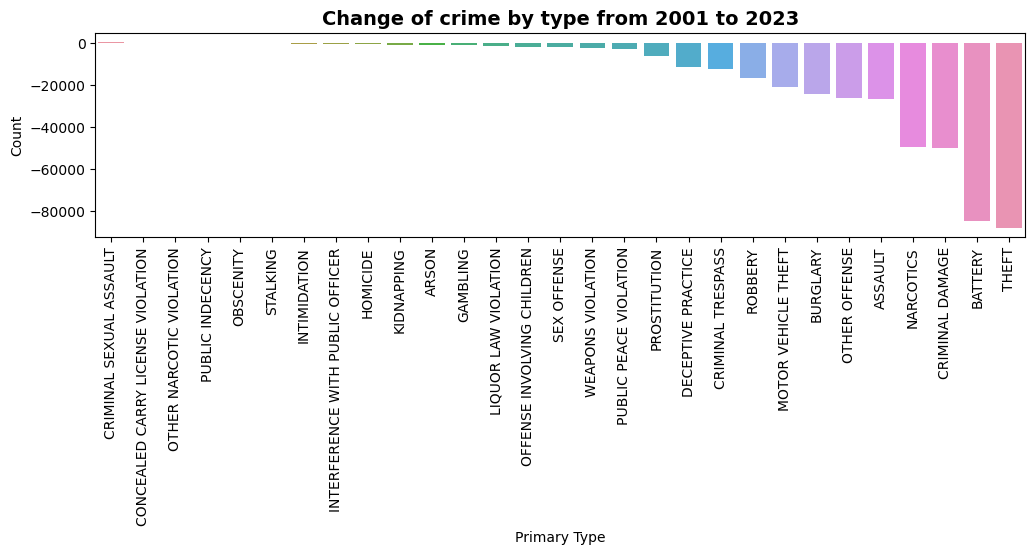

In [84]:
# plot the changes
plt.rcParams['figure.figsize'] = (12,3)
fig, ax = plt.subplots()
sns.barplot(data=change_crime_years, x='Primary Type' ,y='Count')
ax.set_title('Change of crime by type from 2001 to 2023', fontsize=14, weight = 'bold')
fig = ax.get_figure()
fig.autofmt_xdate(rotation = 90, ha = 'center')

In [85]:
## Save to PNG
FOLDER = "PNG/"
fig.savefig(f'{FOLDER}/change-crime-by-type.png',bbox_inches='tight')

### 3. Comparing Months

#### What months have the most crime? What months have the least?

In [86]:
# inspect df_daycount
df_daycount.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8119 entries, 2001-01-01 to 2023-03-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   8119 non-null   int64
dtypes: int64(1)
memory usage: 126.9 KB


In [97]:
# group by month
df_monthcount = df_daycount.copy()
df_monthcount['Month'] = df_monthcount.index.month
df_monthcount['MonthName'] = df_monthcount.index.month_name()
df_monthcount = df_monthcount.reset_index()
df_monthcount = df_monthcount.groupby(['Month','MonthName'])['Count'].sum().to_frame('Count')
df_monthcount = df_monthcount.reset_index()
df_monthcount.sort_values('Count',ascending=False)

,Month,MonthName,Count
6,7,July,717048
7,8,August,710209
4,5,May,682775
5,6,June,681565
9,10,October,676081
8,9,September,668030
2,3,March,645322
3,4,April,626998
0,1,January,621738
10,11,November,608773


**Answer**
- **July** has the highest number of crimes
- **February** has the lowest number of crimes

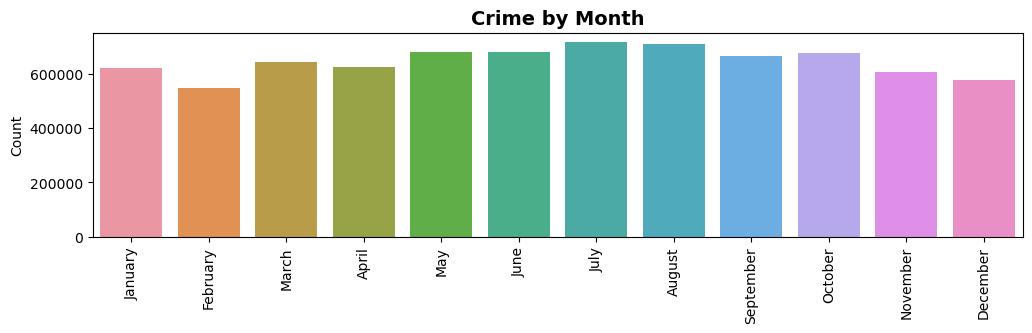

In [100]:
# plot the changes
plt.rcParams['figure.figsize'] = (12,3)
fig, ax = plt.subplots()
sns.barplot(data=df_monthcount, x='Month' ,y='Count')
ax.set_title('Crime by Month', fontsize=14, weight = 'bold')
ax.set(xticklabels = (list(df_monthcount['MonthName'])))
ax.set_xlabel('')
fig = ax.get_figure()
fig.autofmt_xdate(rotation = 90, ha = 'center')

In [101]:
## Save to PNG
FOLDER = "PNG/"
fig.savefig(f'{FOLDER}/crime-by-month.png',bbox_inches='tight')

#### Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [107]:
# create a yearly data and group by each Primary Type
# Resample the dataframe grouped by month
crime_mo_type = df.groupby(['Primary Type']).resample('MS')['Count'].sum().reset_index()
crime_mo_type['Month'] = crime_mo_type['Datetime'].dt.month
crime_mo_type['MonthName'] = crime_mo_type['Datetime'].dt.month_name()
crime_mo_type

,Primary Type,Datetime,Count,Month,MonthName
0,ARSON,2001-01-01,67,1,January
1,ARSON,2001-02-01,57,2,February
2,ARSON,2001-03-01,93,3,March
3,ARSON,2001-04-01,89,4,April
4,ARSON,2001-05-01,94,5,May
...,...,...,...,...,...
8691,WEAPONS VIOLATION,2022-11-01,596,11,November
8692,WEAPONS VIOLATION,2022-12-01,542,12,December
8693,WEAPONS VIOLATION,2023-01-01,739,1,January
8694,WEAPONS VIOLATION,2023-02-01,640,2,February


In [109]:
# group data
crime_mo_type = crime_mo_type.groupby(['Month','MonthName','Primary Type'])['Count'].sum().to_frame('Count')
crime_mo_type = crime_mo_type.reset_index()
crime_mo_type

,Month,MonthName,Primary Type,Count
0,1,January,ARSON,963
1,1,January,ASSAULT,36510
2,1,January,BATTERY,104453
3,1,January,BURGLARY,33309
4,1,January,CONCEALED CARRY LICENSE VIOLATION,82
...,...,...,...,...
416,12,December,ROBBERY,25748
417,12,December,SEX OFFENSE,1902
418,12,December,STALKING,330
419,12,December,THEFT,126612


In [115]:
# pivot table
crime_mo_type_piv = crime_mo_type.pivot(index = ['Month','MonthName'], columns = 'Primary Type')
crime_mo_type_piv

Count                                 \
Primary Type       ARSON   ASSAULT    BATTERY  BURGLARY   
Month MonthName                                           
1     January     963.00 36,510.00 104,453.00 33,309.00   
2     February    840.00 34,900.00  96,633.00 26,192.00   
3     March     1,126.00 43,087.00 120,552.00 30,531.00   
4     April     1,099.00 42,031.00 118,495.00 31,372.00   
5     May       1,230.00 48,454.00 135,675.00 36,066.00   
6     June      1,236.00 47,252.00 135,904.00 35,958.00   
7     July      1,349.00 47,900.00 136,810.00 39,279.00   
8     August    1,183.00 46,455.00 128,727.00 40,596.00   
9     September 1,131.00 45,423.00 122,339.00 38,389.00   
10    October   1,117.00 42,921.00 118,804.00 39,551.00   
11    November  1,019.00 36,388.00 102,951.00 37,037.00   
12    December    923.00 34,318.00  98,358.00 35,636.00   

                                                                       \
Primary Type    CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Month MonthName                                                         
1     January                               82.00            2,579.00   
2     February                              83.00            1,902.00   
3     March                                 91.00            2,117.00   
4     April                                 78.00            2,136.00   
5     May                                   96.00            2,410.00   
6     June                                  92.00            2,518.00   
7     July                                  95.00            2,679.00   
8     August                                96.00            2,605.00   
9     September                            118.00            2,455.00   
10    October                               99.00            2,341.00   
11    November                              73.00            2,046.00   
12    December                              64.00            1,855.00   

                                                                           \
Primary Type    CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Month MonthName                                                             
1     January         64,955.00                  639.00         18,856.00   
2     February        57,355.00                  526.00         17,057.00   
3     March           73,658.00                  588.00         19,088.00   
4     April           75,103.00                  436.00         17,737.00   
5     May             79,682.00                  528.00         18,379.00   
6     June            78,919.00                  584.00         17,492.00   
7     July            83,394.00                  596.00         18,029.00   
8     August          81,709.00                  575.00         18,563.00   
9     September       75,469.00                  544.00         17,914.00   
10    October         80,060.00                  570.00         18,328.00   
11    November        71,563.00                  493.00         16,735.00   
12    December        63,127.00                  466.00         15,803.00   

                                                                        \
Primary Type    DECEPTIVE PRACTICE DOMESTIC VIOLENCE GAMBLING HOMICIDE   
Month MonthName                                                          
1     January            31,491.00              1.00   361.00   838.00   
2     February           26,530.00               NaN   389.00   689.00   
3     March              29,523.00               NaN   745.00   820.00   
4     April              27,605.00               NaN 1,238.00   964.00   
5     May                27,490.00               NaN 1,637.00 1,117.00   
6     June               28,207.00               NaN 1,874.00 1,275.00   
7     July               28,488.00               NaN 1,964.00 1,387.00   
8     August             29,118.00               NaN 2,219.00 1,252.00   
9     September          27,848.00               NaN 1,799.00 1,211

In [116]:
# drop the first level of columns
crime_mo_type_piv.columns = crime_mo_type_piv.columns.droplevel(0)
crime_mo_type_piv = crime_mo_type_piv.reset_index()
crime_mo_type_piv

Primary Type,Month,MonthName,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,1,January,963.00,"36,510.00","104,453.00","33,309.00",82.00,"2,579.00","64,955.00",639.00,"18,856.00","31,491.00",1.00,361.00,838.00,15.00,"1,363.00",383.00,608.00,"1,157.00","33,045.00","66,408.00",2.00,11.00,1.00,76.00,"6,341.00",8.00,"43,392.00","6,446.00",8.00,"3,552.00",3.00,"24,301.00","2,793.00",422.00,"127,694.00","8,672.00"
1,2,February,840.00,"34,900.00","96,633.00","26,192.00",83.00,"1,902.00","57,355.00",526.00,"17,057.00","26,530.00",NaN,389.00,689.00,11.00,"1,369.00",323.00,526.00,"1,105.00","27,278.00","64,399.00",5.00,12.00,2.00,55.00,"4,142.00",15.00,"39,779.00","5,674.00",16.00,"3,462.00",1.00,"17,855.00","2,099.00",344.00,"108,678.00","7,040.00"
2,3,March,"1,126.00","43,087.00","120,552.00","30,531.00",91.00,"2,117.00","73,658.00",588.00,"19,088.00","29,523.00",NaN,745.00,820.00,10.00,"1,526.00",422.00,624.00,"1,441.00","30,549.00","69,428.00",0.00,12.00,1.00,89.00,"4,747.00",12.00,"44,331.00","6,147.00",9.00,"4,719.00",3.00,"20,723.00","2,446.00",423.00,"127,052.00","8,682.00"
3,4,April,"1,099.00","42,031.00","118,495.00","31,372.00",78.00,"2,136.00","75,103.00",436.00,"17,737.00","27,605.00",NaN,"1,238.00",964.00,3.00,"1,437.00",377.00,556.00,"1,347.00","27,909.00","62,960.00",1.00,11.00,1.00,51.00,"4,427.00",9.00,"41,617.00","6,034.00",13.00,"4,341.00",1.00,"20,907.00","2,270.00",392.00,"125,636.00","8,404.00"
4,5,May,"1,230.00","48,454.00","135,675.00","36,066.00",96.00,"2,410.00","79,682.00",528.00,"18,379.00","27,490.00",NaN,"1,637.00","1,117.00",5.00,"1,645.00",412.00,685.00,"1,392.00","29,634.00","63,143.00",4.00,12.00,0.00,72.00,"4,870.00",18.00,"42,184.00","6,089.00",22.00,"5,493.00",1.00,"23,710.00","2,796.00",396.00,"137,494.00","9,934.00"
5,6,June,"1,236.00","47,252.00","135,904.00","35,958.00",92.00,"2,518.00","78,919.00",584.00,"17,492.00","28,207.00",NaN,"1,874.00","1,275.00",9.00,"1,693.00",392.00,679.00,"1,476.00","30,416.00","58,947.00",9.00,14.00,0.00,65.00,"4,774.00",9.00,"40,648.00","5,574.00",22.00,"4,975.00",0.00,"24,407.00","2,926.00",419.00,"143,402.00","9,398.00"
6,7,July,"1,349.00","47,900.00","136,810.00","39,279.00",95.00,"2,679.00","83,394.00",596.00,"18,029.00","28,488.00",NaN,"1,964.00","1,387.00",8.00,"1,787.00",425.00,625.00,"1,350.00","32,665.00","61,878.00",2.00,17.00,1.00,72.00,"4,533.00",17.00,"41,526.00","5,875.00",13.00,"4,721.00",1.00,"27,245.00","3,048.00",428.00,"159,053.00","9,788.00"
7,8,August,"1,183.00","46,455.00","128,727.00","40,596.00",96.00,"2,605.00","81,709.00",575.00,"18,563.00","29,118.00",NaN,"2,219.00","1,252.00",9.00,"1,819.00",405.00,584.00,"1,303.00","32,725.00","64,330.00",5.00,18.00,1.00,52.00,"4,574.00",18.00,"41,066.00","6,284.00",25.00,"4,397.00",3.00,"27,394.00","2,877.00",405.00,"158,930.00","9,887.00"
8,9,September,"1,131.00","45,423.00","122,339.00","38,389.00",118.00,"2,455.00","75,469.00",544.00,"17,914.00","27,848.00",NaN,"1,799.00","1,211.00",15.00,"1,677.00",440.00,620.00,"1,262.00","31,712.00","60,870.00",5.00,17.00,1.00,69.00,"4,398.00",14.00,"37,152.00","5,877.00",19.00,"4,884.00",3.00,"26,164.00","2,771.00",395.00,"145,591.00","9,434.00"
9,10,October,"1,117.00","42,921.00","118,804.00","39,551.00",99.00,"2,341.00","80,060.00",570.00,"18,328.00","29,383.00",NaN,"1,305.00","1,081.00",9.00,"1,497.00",443.00,538.00,"1,218.00","33,761.00","61,738.00",2.00,22.00,0.00,93.00,"4,344.00",6.00,"39,413.00","5,925.00",15.00,"4,861.00",3.00,"27,76

In [117]:
crime_mo_type_piv['MonthName'].loc[crime_mo_type_piv['ARSON'].idxmax()]

'July'

In [119]:
# loop over all primary types
crime_type = list(crime_mo_type['Primary Type'].unique())
crime_type

['ARSON',
 'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CONCEALED CARRY LICENSE VIOLATION',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL SEXUAL ASSAULT',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'DOMESTIC VIOLENCE',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'INTIMIDATION',
 'KIDNAPPING',
 'LIQUOR LAW VIOLATION',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'NON - CRIMINAL',
 'NON-CRIMINAL',
 'NON-CRIMINAL (SUBJECT SPECIFIED)',
 'OBSCENITY',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER NARCOTIC VIOLATION',
 'OTHER OFFENSE',
 'PROSTITUTION',
 'PUBLIC INDECENCY',
 'PUBLIC PEACE VIOLATION',
 'RITUALISM',
 'ROBBERY',
 'SEX OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS VIOLATION']

In [132]:
result = pd.DataFrame()
for crime in crime_type:
    max_mo = crime_mo_type_piv['MonthName'].loc[crime_mo_type_piv[crime].idxmax()]
    min_mo = crime_mo_type_piv['MonthName'].loc[crime_mo_type_piv[crime].idxmin()]
    
    row = {
    "Primary Type": crime,
    "Max Month": max_mo,
    "Min Month": min_mo}
    
    result = result.append(row, ignore_index=True)
    
#     print(f'{crime} has the max occurrence in {max_mo}, min occurrence in {min_mo}.\n')

/var/folders/b5/4zw81v494szfyy7jswj9bky40000gn/T/ipykernel_1082/3501137419.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(row, ignore_index=True)
/var/folders/b5/4zw81v494szfyy7jswj9bky40000gn/T/ipykernel_1082/3501137419.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(row, ignore_index=True)
/var/folders/b5/4zw81v494szfyy7jswj9bky40000gn/T/ipykernel_1082/3501137419.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(row, ignore_index=True)
/var/folders/b5/4zw81v494szfyy7jswj9bky40000gn/T/ipykernel_1082/3501137419.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

In [133]:
result

,Primary Type,Max Month,Min Month
0,ARSON,July,February
1,ASSAULT,May,December
2,BATTERY,July,February
3,BURGLARY,August,February
4,CONCEALED CARRY LICENSE VIOLATION,September,December
5,CRIM SEXUAL ASSAULT,July,December
6,CRIMINAL DAMAGE,July,February
7,CRIMINAL SEXUAL ASSAULT,January,April
8,CRIMINAL TRESPASS,March,December
9,DECEPTIVE PRACTICE,January,February


- The above table showed the months of max and min months